# Exploring how emojis affect sentiment analysis
## Introduction
The aim of this research is to understand how emoticons and emojis can influence the polarity or sentiment of a sentence in the domain of Sentiment Analysis.

In order to achieve this aim, the research objectives are:
- Conduct a research of how traditional machine learning techniques are applied to the task of Sentiment Analysis. 
- Conduct a research of public datasets containing tweets or reviews which their sentiment manually assigned.
- Implement machine learning techniques and make experiments between them within the selected dataset.
- Explain how the presence of emojis and emoticons influences the results. In case of conflict of polarity between the sentence and the emoji, aim to understand if the text is ironic.

## Document Purpose
1. Load the data into the analysis tool that is to be used for your project. While using R is recommended, the actual choice of tool is up to each of the groups.

2. Identify which are your independent variables and which are your dependent variables (in the data which you have collected or generated).Write a description of the expected properties of each of these variables. Perform exploratory data analysis. Does your data have the expected properties? If not, can you identify why it does not? (Data Analysis section)

3. Identify what statistical tools you will apply to analyze your data. If you have a model for the relationship between the independent and the dependent variables fit your data to this model. If you do not have a model, what could you to do identify a model, for example using principal component analysis? (Data Analysis section, the models will be implemented in further work using ML tools)

4. Generate some visual aids (such as tables or graphs) to present your data to others. (Dataset Visualization section)

## Useful Links
- [Selected dataset](https://www.kaggle.com/crowdflower/twitter-airline-sentiment): The Twitter US Airline Sentiment dataset stored how travelers in February 2015 expressed their feelings of each major U.S.airline on Twitter. The text was manually labeled by contributors into positive, negative and neutral tweets.

## Authors
- Serghei Socolovschi [serghei@kth.se](mailto:serghei@kth.se)
- Angel Igareta [alih2@kth.se](mailto:alih2@kth.se)

## General

### Libraries

In [32]:
library(dplyr) # For %>%
library(ggplot2) # For plotting advanced charts
library(RColorBrewer) # Palettes for charts
library(tidyverse) # Str detect
library(stringi)

### Common

Function to format percentages

In [33]:
percent <- function(x, digits = 2, format = "f", ...) {
  paste0(formatC(x * 100, format = format, digits = digits, ...), "%")
}

Dataset location

In [34]:
dataset_url = "https://drive.google.com/uc?export=download&id=14WSx4do5eLZqwte4l1TJT22nvB2RHwHL"

## Dataset Load

### Load

In [35]:
raw_dataset <- read.csv(dataset_url)
head(raw_dataset)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5.703061e+17,neutral,1.0000,,NA,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.,,2015-02-24 11:35:52 -0800,,Eastern Time (US & Canada)
2,5.703011e+17,positive,0.3486,,0.0000,Virgin America,,jnardino,,0,@VirginAmerica plus you've added commercials to the experience... tacky.,,2015-02-24 11:15:59 -0800,,Pacific Time (US & Canada)
3,5.703011e+17,neutral,0.6837,,NA,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
4,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,,jnardino,,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",,2015-02-24 11:15:36 -0800,,Pacific Time (US & Canada)
5,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,,jnardino,,0,@VirginAmerica and it's a really big bad thing about it,,2015-02-24 11:14:45 -0800,,Pacific Time (US & Canada)
6,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,,jnardino,,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA,,2015-02-24 11:14:33 -0800,,Pacific Time (US & Canada)


In [36]:
dim(raw_dataset)

[1] 14640    15

### Transform columns

Get only columns airline_sentiment, airline_sentiment_confidence (to maybe discard it over a threshold in the future) and text.

In [37]:
target_columns <- c("airline_sentiment", "airline_sentiment_confidence", "text")
dataset <- raw_dataset[target_columns]

Rename airline_sentiment by sentiment and airline_sentiment_confidence by sentiment_confidence

In [38]:
dataset <- dataset %>% rename(sentiment = airline_sentiment)
dataset <- dataset %>% rename(sentiment_confidence = airline_sentiment_confidence)

Convert sentiment to numeric (positive = 1, neutral = 0 and negative = -1)

In [39]:
dataset <- dataset %>% mutate(sentiment_numeric = case_when(
  sentiment == "positive" ~ 1,
  sentiment == "neutral" ~ 0,
  sentiment == "negative" ~ -1
))

### Summary

In [40]:
summary(dataset)
head(dataset)

  sentiment         sentiment_confidence     text           sentiment_numeric
 Length:14640       Min.   :0.3350       Length:14640       Min.   :-1.0000  
 Class :character   1st Qu.:0.6923       Class :character   1st Qu.:-1.0000  
 Mode  :character   Median :1.0000       Mode  :character   Median :-1.0000  
                    Mean   :0.9002                          Mean   :-0.4655  
                    3rd Qu.:1.0000                          3rd Qu.: 0.0000  
                    Max.   :1.0000                          Max.   : 1.0000  

,sentiment,sentiment_confidence,text,sentiment_numeric
,<chr>,<dbl>,<chr>,<dbl>
1,neutral,1.0000,@VirginAmerica What @dhepburn said.,0
2,positive,0.3486,@VirginAmerica plus you've added commercials to the experience... tacky.,1
3,neutral,0.6837,@VirginAmerica I didn't today... Must mean I need to take another trip!,0
4,negative,1.0000,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",-1
5,negative,1.0000,@VirginAmerica and it's a really big bad thing about it,-1
6,negative,1.0000,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA,-1


## Dataset Preprocessing

### Handle duplicates and null values

In [41]:
## Number of duplicated rows
nrow(dataset[duplicated(dataset$text), ])

[1] 213

In [42]:
dataset[duplicated(dataset$text), ]

,sentiment,sentiment_confidence,text,sentiment_numeric
,<chr>,<dbl>,<chr>,<dbl>
332,positive,0.6482,@VirginAmerica Thanks!,1
516,positive,0.6634,@united thanks,1
1478,positive,0.6629,@united thank you!,1
1865,positive,0.3512,@united thank you,1
1939,positive,1.0000,@united thank you,1
1970,positive,1.0000,@united thank you!,1
2286,positive,0.6809,@united thanks,1
2648,positive,0.6749,@united thank you.,1
2860,positive,1.0000,@united thanks,1


In [43]:
## Remove duplicates
dataset <- dataset[!duplicated(dataset$text), ]
nrow(dataset[duplicated(dataset$text), ])

[1] 0

In [44]:
## Number of null values
sum(is.na(dataset))

[1] 0

### Add columns for analysis

In [45]:
preprocessed_dataset <- dataset

In [46]:
emoji_regex = regex("([\U{1F300}-\U{1F6FF}])")
not_emoji_regex = regex("[^[\U{1F300}-\U{1F6FF}]]")
emoticon_regex = regex("(?::|;|=)(?:-)?(?:\\)|D|P)") # https://stackoverflow.com/questions/5862490/how-to-match-emoticons-with-regular-expressions
not_emoticon_regex = regex("^(?::|;|=)(?:-)?(?:\\)|D|P)")
url_regex = regex("(https?://)?([\\w\\-])+\\.{1}([a-zA-Z]{2,63})([/\\w-]*)*/?\\??([^#\n\r]*)?#?([^\n\r]*)") # Simpler => (http[^ ]*)|(www\.[^ ]*)
mention_regex = regex("(@[\\w_-]+)")
hashtag_regex = regex("(#[\\w_-]+)")

## Add columns hasEmoji, hasEmoticon, hasUrl, hasMention, hasHashtag
preprocessed_dataset <- preprocessed_dataset %>% 
  mutate(hasEmoji = ifelse(str_detect(text, emoji_regex), TRUE, FALSE)) %>%
  mutate(hasEmoticon = ifelse(str_detect(text, emoticon_regex), TRUE, FALSE)) %>%
  mutate(hasUrl = ifelse(str_detect(text, url_regex), TRUE, FALSE)) %>%
  mutate(hasMention = ifelse(str_detect(text, mention_regex), TRUE, FALSE)) %>%
  mutate(hasHashtag = ifelse(str_detect(text, hashtag_regex), TRUE, FALSE))

In [47]:
head(preprocessed_dataset, 10)

,sentiment,sentiment_confidence,text,sentiment_numeric,hasEmoji,hasEmoticon,hasUrl,hasMention,hasHashtag
,<chr>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,neutral,1.0000,@VirginAmerica What @dhepburn said.,0,FALSE,FALSE,FALSE,TRUE,FALSE
2,positive,0.3486,@VirginAmerica plus you've added commercials to the experience... tacky.,1,FALSE,FALSE,FALSE,TRUE,FALSE
3,neutral,0.6837,@VirginAmerica I didn't today... Must mean I need to take another trip!,0,FALSE,FALSE,FALSE,TRUE,FALSE
4,negative,1.0000,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",-1,FALSE,FALSE,FALSE,TRUE,FALSE
5,negative,1.0000,@VirginAmerica and it's a really big bad thing about it,-1,FALSE,FALSE,FALSE,TRUE,FALSE
6,negative,1.0000,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA,-1,FALSE,FALSE,FALSE,TRUE,FALSE
7,positive,0.6745,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1,FALSE,TRUE,FALSE,TRUE,FALSE
8,neutral,0.6340,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",0,FALSE,FALSE,TRUE,TRUE,FALSE
9,positive,0.6559,"@virginamerica Well, I didn't…but NOW I DO! :-D",1,FALSE,TRUE,FALSE,TRUE,FALSE


### Normalize Dataset

Create a new normalized_dataset only leaving the rows that contain emojis or emoticons and a few more of the ones that do not contain graphic elements.

In [48]:
subset_with_graphics <- preprocessed_dataset %>% filter(hasEmoji == TRUE | hasEmoticon == TRUE) 
subset_without_graphics <- preprocessed_dataset %>% filter(hasEmoji == FALSE & hasEmoticon == FALSE) %>% sample_n(nrow(subset_with_graphics))
preprocessed_dataset <- rbind(subset_with_graphics, subset_without_graphics)

# Shuffle the rows
preprocessed_dataset <- preprocessed_dataset %>% sample_n(nrow(preprocessed_dataset))

summary(preprocessed_dataset)

  sentiment         sentiment_confidence     text           sentiment_numeric
 Length:1320        Min.   :0.3373       Length:1320        Min.   :-1.0000  
 Class :character   1st Qu.:0.6790       Class :character   1st Qu.:-1.0000  
 Mode  :character   Median :1.0000       Mode  :character   Median : 0.0000  
                    Mean   :0.8811                          Mean   :-0.1508  
                    3rd Qu.:1.0000                          3rd Qu.: 1.0000  
                    Max.   :1.0000                          Max.   : 1.0000  
  hasEmoji       hasEmoticon       hasUrl        hasMention     hasHashtag     
 Mode :logical   Mode :logical   Mode :logical   Mode:logical   Mode :logical  
 FALSE:898       FALSE:1072      FALSE:1182      TRUE:1320      FALSE:1093     
 TRUE :422       TRUE :248       TRUE :138                      TRUE :227      
                                                                               
                                                      

In [64]:
dim(preprocessed_dataset)

[1] 1320    9

### Clean Dataset

Remove mentions, hashtags, urls and maybe punctuations. Review that emoticons and emojis have not been erased.

In [50]:
cleaned_dataset <- preprocessed_dataset

# Remove mentions, URLs and hashtags and multiple spaces
cleaned_dataset <- cleaned_dataset %>%
  # mutate(text = str_replace_all(text, mention_regex, " ")) %>%
  mutate(text = str_replace_all(text, url_regex, " ")) %>%
  # mutate(text = str_replace_all(text, hashtag_regex, " ")) %>%
  mutate(text = str_replace_all(text, "\\s+", " "))

# Build emoticons dictionary (might be not the optimal one, but it should cover the majority of the most used emoticons)
emots <- as.character(outer(c(":", ";", ":-", ";-"), c(")", "(", "]", "[", "D", "o", "O", "P", "p"), stri_paste))

# Helper function for escaping special characters
escape_regex <- function(r) {
   stri_replace_all_regex(r, "\\(|\\)|\\[|\\]", "\\\\$0")
}

# Emoticon regular expression
regex1 <- stri_c("(", stri_c(escape_regex(emots), collapse="|"), ")")

# Removing punctuation, but keeping the emoticons and ' (https://stackoverflow.com/questions/23447261/remove-punctuation-but-keeping-emoticons)
# We just match (emoticon)|punctuation (note that emoticons are in a capturing group) and then replace the matches with the result of capturing group 1 
# (so if it's an emoticon, we have replacement=this emoticon, if it's a punctuation char, we have replacement=nothing)
cleaned_dataset <- cleaned_dataset %>%
 mutate(text = stri_replace_all_regex(text, stri_c(regex1, "|[^\\P{P}'@#]+"), "$1 "))

head(cleaned_dataset, 10)

,sentiment,sentiment_confidence,text,sentiment_numeric,hasEmoji,hasEmoticon,hasUrl,hasMention,hasHashtag
,<chr>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,positive,1.0000,@JetBlue okie doke Knowing you you will fix this ;),1,FALSE,TRUE,FALSE,TRUE,FALSE
2,negative,1.0000,@AmericanAir ah if only we could get through We've tried for over 2 hrs Can we call @united,-1,FALSE,FALSE,FALSE,TRUE,FALSE
3,neutral,0.6755,@AmericanAir 3659 from SGF gt DFW You might want to clear off the ice for the planes landing 😳,0,TRUE,FALSE,FALSE,TRUE,FALSE
4,neutral,1.0000,@SouthwestAir I'm 30 mins out WAIT FOR ME😭😭😭,0,TRUE,FALSE,FALSE,TRUE,FALSE
5,neutral,0.3650,@united I take it as a compliment that I was mistaken several times as a member of your staff on my flight time to remove my scarf :),0,FALSE,TRUE,FALSE,TRUE,FALSE
6,negative,0.6421,@united #unitedairlines so is it 6 20 pm or 12 20 ORD ABQ 3709 I can't even take a walk without missing a change,-1,FALSE,FALSE,FALSE,TRUE,TRUE
7,neutral,0.6600,@JetBlue @pilyoc dont talk about my friend @JetBlue like that #thefutureisweird,0,FALSE,FALSE,FALSE,TRUE,TRUE
8,negative,1.0000,@USAirways thanks for a subpar travel experience and it's not even over yet #stepitup,-1,FALSE,FALSE,FALSE,TRUE,TRUE
9,negative,1.0000,@USAirways flight 813 DCA to CLT stuck waiting on CLT ATC Cmon #FAA Missing flt 826 CLT to MBJ hope you can rebook me 816,-1,FALSE,FALSE,FALSE,TRUE,TRUE


In [51]:
nrow(cleaned_dataset)

[1] 1320

### Save Dataset

In [52]:
write.csv(cleaned_dataset, "tweets_processed.csv")

## Dataset Analysis

### Independent and dependent variables

The main topic of the research is the analysis of the impact that graphical elements, such as emojis and emoticons, have on the sentiment analysis.

In order to perform such analysis, the required data needs to have following properties:


*   Data needs to be in a textual format, preferebly short.
*   The text needs to contain special graphical elements, such as emojis and emoticons.
*   The dataset contains sentiment labels assigned to each statement, either in textual (negative, neutral, positive) or numerical (-1,0,1) format.

The chosen dataset respects all of the following requirements. It contains numerous tweets with the customer feedback about U.S. airlines service. The tweets contain emojis and emoticons, and the sentiment label for each tweet with the confidence estimation.

The independent variables of the study are the tweets. The dependent variables are the sentiment evaluations given to each tweet (negative, neutral, positive).

To understand the correlation between the tweets and their sentiment labels, Machine Learning (ML) techniques will be utilized, such as Support Vector Machines, Naive Bayes, etc. The ML algorithms will be fed with the tweets and sentiment label and build a model that will show which features (words, emojis, n-grams) affect the most the sentiment analysis.






### Exploratory data analysis

As the expected properties of the independent variable text are that it contains both emojis and emoticons, now we are going to analyze the density of these graphics elements in the normalized dataset. 

In [53]:
total_rows <- nrow(preprocessed_dataset)

print("Number of total rows")
print(total_rows)

print("Percentage of rows containing emoticons")
print(percent(nrow(preprocessed_dataset %>% filter(hasEmoticon == TRUE)) / total_rows))

print("Percentage of rows containing emojis")
print(percent(nrow(preprocessed_dataset %>% filter(hasEmoji == TRUE)) / total_rows))

print("Percentage of rows containing the union")
print(percent(nrow(preprocessed_dataset %>% filter(hasEmoticon == TRUE | hasEmoji == TRUE)) / total_rows))

print("Percentage of rows containing the intersection")
print(percent(nrow(preprocessed_dataset %>% filter(hasEmoticon == TRUE & hasEmoji == TRUE)) / total_rows))

[1] "Number of total rows"
[1] 1320
[1] "Percentage of rows containing emoticons"
[1] "18.79%"
[1] "Percentage of rows containing emojis"
[1] "31.97%"
[1] "Percentage of rows containing the union"
[1] "50.00%"
[1] "Percentage of rows containing the intersection"
[1] "0.76%"


Before using ML models to see how the sentiment could be affected by the inclusion of emoticons and emojis in the text. Here, we we are going to print the density of each class of sentiment

Next, we present the unique emojis for each sentiment category, which provide valuable insights of the sentiment correlation with the graphic elements contained in the text.

In [54]:
print("Number of texts with emojis for in each sentiment category")
preprocessed_dataset %>% filter(hasEmoji == TRUE) %>% count(sentiment_numeric) %>% mutate(density = percent(n / sum(n)))
print("Number of texts with emoticons for each sentiment category")
preprocessed_dataset %>% filter(hasEmoticon == TRUE) %>% count(sentiment_numeric) %>% mutate(density = percent(n / sum(n)))
print("Number of texts without graphic elements for each sentiment category")
preprocessed_dataset %>% filter(hasEmoticon == FALSE & hasEmoji == FALSE) %>% count(sentiment_numeric) %>% mutate(density = percent(n / sum(n)))

[1] "Number of texts with emojis for in each sentiment category"


sentiment_numeric,n,density
<dbl>,<int>,<chr>
-1,147,34.83%
0,116,27.49%
1,159,37.68%


[1] "Number of texts with emoticons for each sentiment category"


sentiment_numeric,n,density
<dbl>,<int>,<chr>
-1,33,13.31%
0,51,20.56%
1,164,66.13%


[1] "Number of texts without graphic elements for each sentiment category"


sentiment_numeric,n,density
<dbl>,<int>,<chr>
-1,431,65.30%
0,133,20.15%
1,96,14.55%


In [55]:
preprocessed_dataset %>%
   mutate(text = strsplit(str_replace_all(text, not_emoji_regex, ""), NULL)) %>%
   group_by(sentiment_numeric) %>% 
   summarise(listedEmojis = list(unique(unlist(text))))

`summarise()` ungrouping output (override with `.groups` argument)



sentiment_numeric,listedEmojis
<dbl>,<list>
-1,"😕, 😢, 🙌, 💤, 😳, 😤, 🐴, 😡, 😒, 👎, 👌, 😔, 😥, 👀, 😉, 👋, 😐, 😑, 👍, 😂, 👺, 😃, 💔, 😩, 😅, 😪, 😦, 👊, 😏, 😄, 😘, 😖, 😲, 💩, 😠, 😓, 😭, 😊, 😈, 😎, 😞, 😁, 😫, 💝, 🐳, 😣, 💁, 👠, 💺, 👿, 👏, 😷, 😱, 📱, 🍅, 😬"
0,"😳, 😭, 😊, 😩, 😉, 😁, 🙌, 😐, 😑, 🌴, 👀, 🙏, 😂, 😢, 😞, 💗, 🎀, 😆, 😵, 😘, 😔, 🙅, 🌞, 👸, 😍, 🌏, 😮, 💔, 😏, 👍, 🙈, 💝, 😜, 😕, 💪, 😎, 👎, 😄, 😒, 💯, 😬, 🍷, 💺, 👉, 🚪, 😀, 😃, 🚫, 👌, 😖, 🙉, 😫, 🚶, 😷"
1,"👏, 😜, 👍, 😄, 💜, 💙, 🎉, 😉, 🙏, 😏, 🙅, 😊, 👌, 😘, 🙌, 😢, 🌴, 🍸, 🎲, 😁, 😍, 🌏, 😂, 😀, 😋, 🍻, 🌞, 📲, 😃, 👠, 👀, 💯, 😻, 💕, 💺, 👊, 🎵, 💁, 💘, 😩, 😭, 🔵, 💗, 😱, 😞, 😎, 🌟, 🐩, 💖, 😒"


Finally, the top 5 emojis for each sentiment. Here we could think that if the text contains an angry face (😡) it is more probable to be negative and if it contains a prayer icon (🙏) it would be positive. But for more precise conclusions also the density in the whole corpus should be considered.

In [56]:
top_5_emojis <- preprocessed_dataset %>%
   mutate(text = strsplit(str_replace_all(text, not_emoji_regex, ""), NULL)) %>%
   group_by(sentiment_numeric) %>% 
   summarise(emoji = unique(unlist(text)), total_emojis = list(unlist(text))) %>%
   rowwise() %>% # So the mutate executes per row and emoji is a character instead of list
   mutate(occurences_raw = list(lapply(total_emojis, function (a) a == emoji))) %>%
   mutate(occurences = length(occurences_raw[occurences_raw == TRUE])) %>%
   mutate(occurences_density = percent(occurences / length(occurences_raw))) %>%
   select(sentiment_numeric, emoji, occurences, occurences_density) %>%
   group_by(sentiment_numeric) %>%
   top_n(5, wt = occurences) %>%
   arrange(sentiment_numeric, desc(occurences))

top_5_emojis
# top_5_emojis %>% 
#   filter(sentiment_numeric == -1) %>% 
#   ggplot(aes(fct_reorder(emoji, occurences, .desc = TRUE), occurences)) +
#   geom_col() +
#   # theme_minimal() +
#   theme(axis.text.x = element_markdown()) +
#   labs(x = NULL)

`summarise()` regrouping output by 'sentiment_numeric' (override with `.groups` argument)



sentiment_numeric,emoji,occurences,occurences_density
<dbl>,<chr>,<int>,<chr>
-1,😡,33,14.35%
-1,👎,15,6.52%
-1,😒,14,6.09%
-1,😂,13,5.65%
-1,😭,12,5.22%
0,😂,43,19.82%
0,😭,27,12.44%
0,😁,11,5.07%
0,😢,10,4.61%


## Dataset Visualization

### Tweet Sentiment Distribution
Chart representing how is the sentiment distributed among the tweets in the dataset. We can see it is more or less balanced, although a significant amount of tweets are negative.

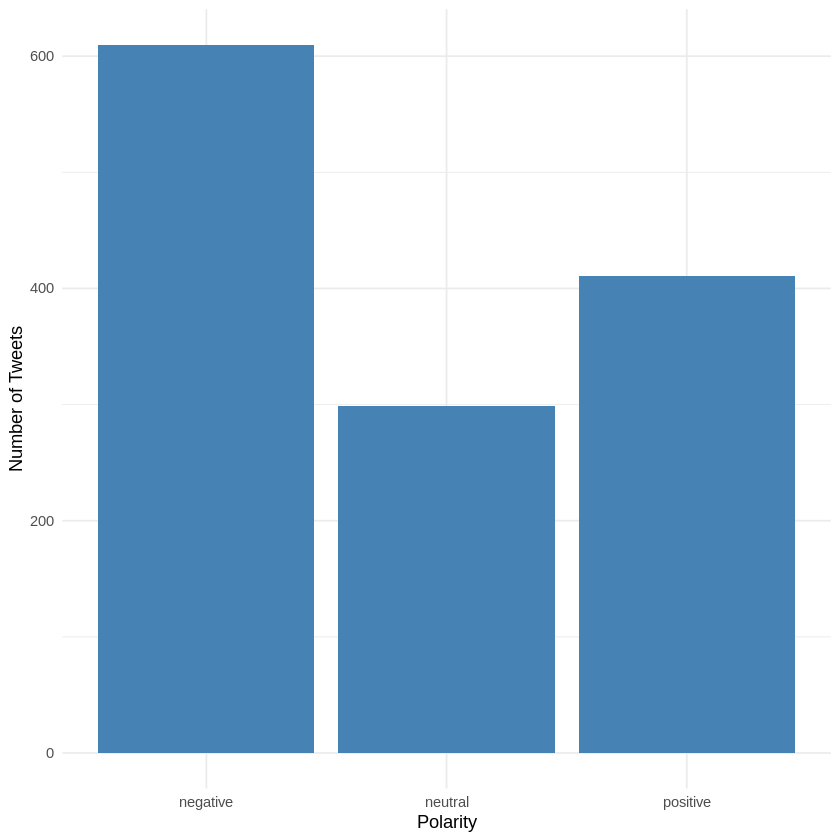

In [66]:
preprocessed_dataset %>%
  ggplot(aes(x=sentiment)) + 
  geom_bar(fill="steelblue") + 
  xlab("Polarity") + 
  ylab("Number of Tweets") +
  # ggtitle("Tweet Sentiment Distribution") +
  theme_minimal()

### Tweet Length Distribution and the polarity
Chart representing how the sentiment is distributed attending to the tweet length. As we can see, the longest tweets usually correspond with the negative class.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



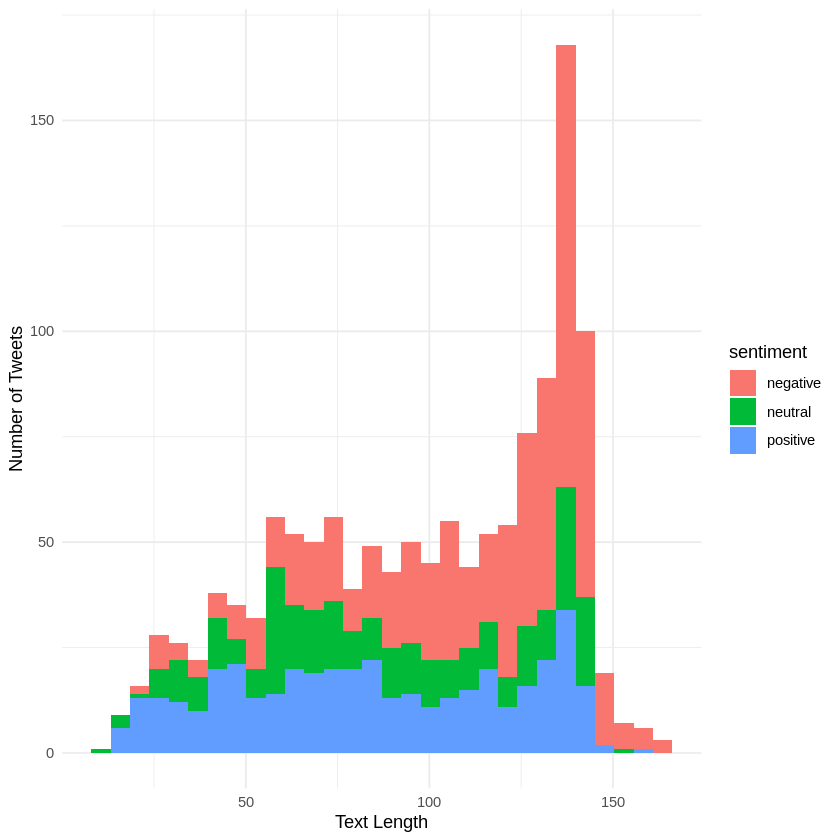

In [67]:
preprocessed_dataset %>% 
  mutate(text_length = nchar(text)) %>% 
  ggplot(aes(x=text_length, fill=sentiment)) + 
  geom_histogram() + 
  xlab("Text Length") + 
  ylab("Number of Tweets") +
  # ggtitle("Tweet Length Distribution") +
  theme_minimal()

### Categories Density
Individual charts representing how a certain element of the tweets appears in the dataset.

#### Emoji Density

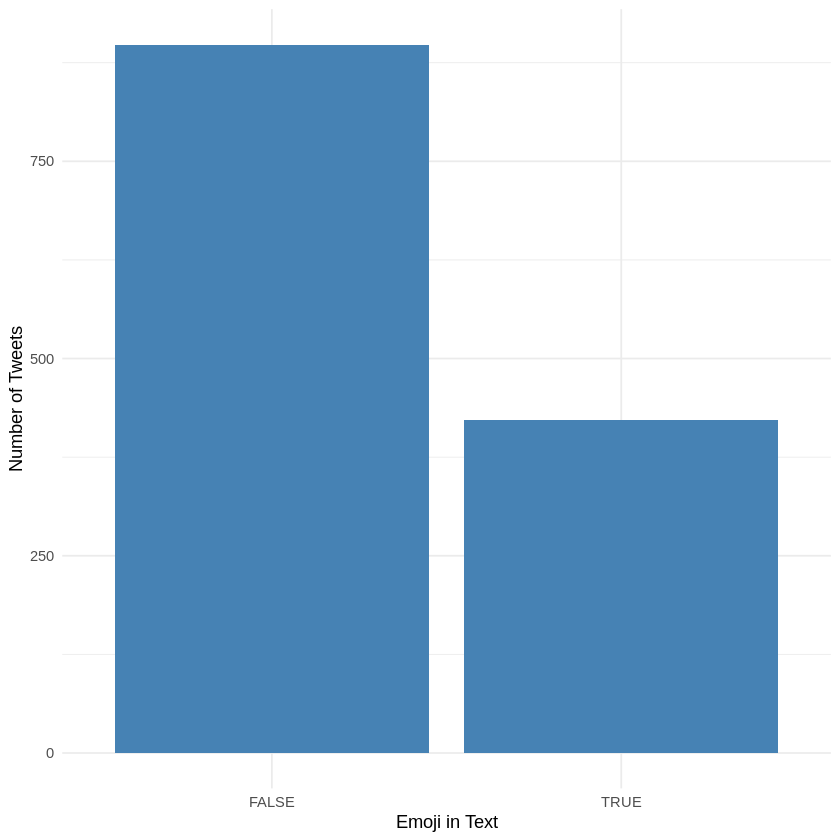

In [68]:
preprocessed_dataset %>%
  ggplot(aes(x=hasEmoji)) + 
  geom_bar(fill="steelblue") + 
  xlab("Emoji in Text") + 
  ylab("Number of Tweets") +
  # ggtitle("Emoji Density") +
  theme_minimal()

#### Emoticon Density

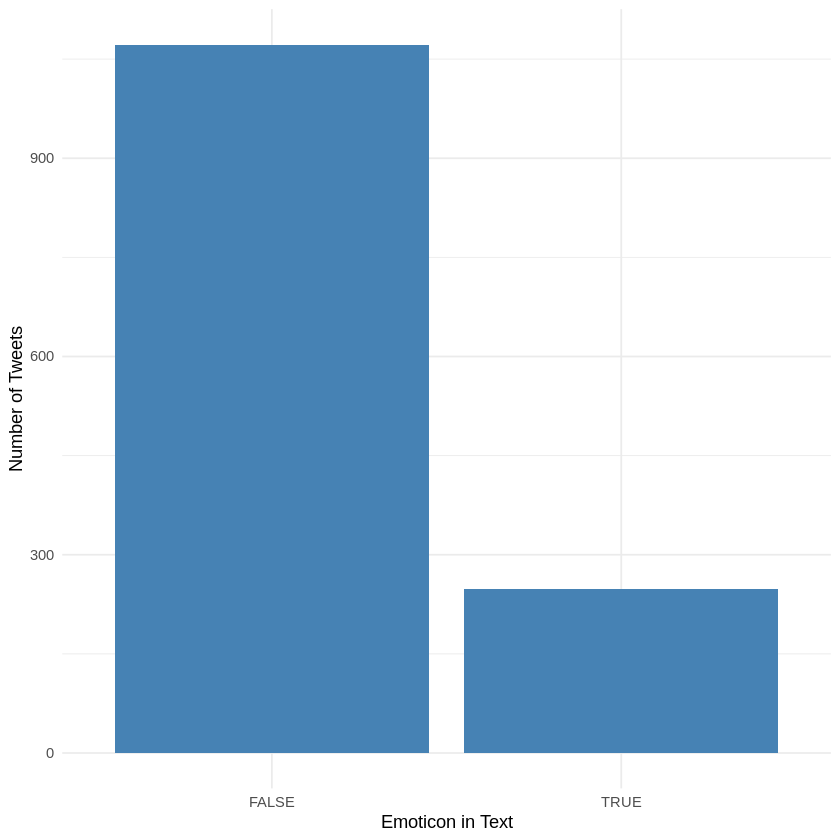

In [69]:
preprocessed_dataset %>%
  ggplot(aes(x=hasEmoticon)) + 
  geom_bar(fill="steelblue") + 
  xlab("Emoticon in Text") + 
  ylab("Number of Tweets") +
  # ggtitle("Emoticon Density") +
  theme_minimal()

#### Mention Density
As all of them are responses to the flight companies, the density is 100%

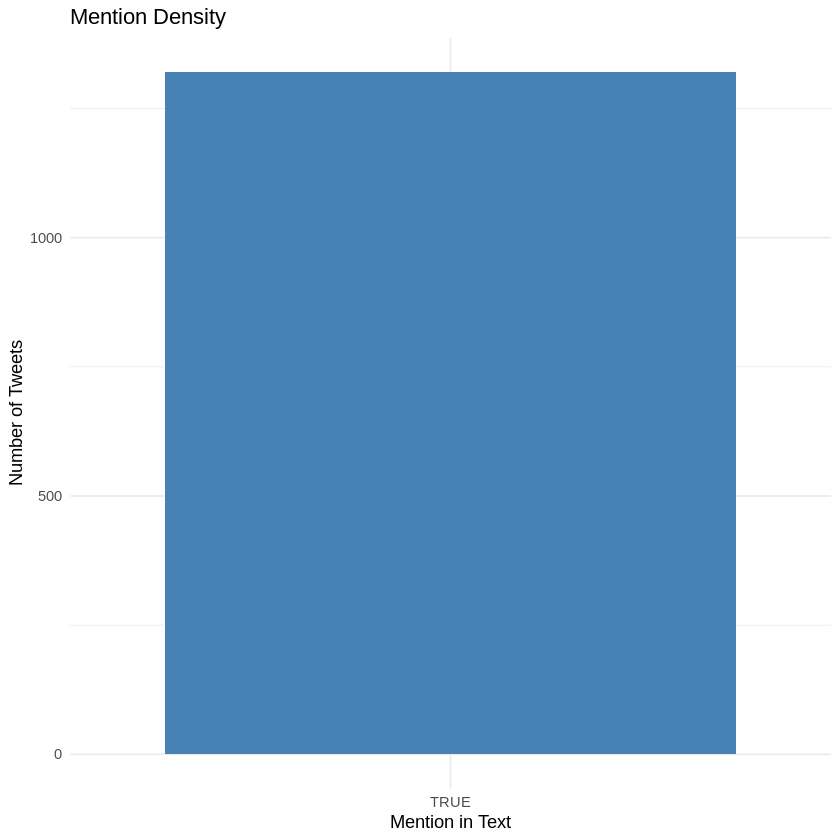

In [61]:
preprocessed_dataset %>%
  ggplot(aes(x=hasMention)) + 
  geom_bar(fill="steelblue") + 
  xlab("Mention in Text") + 
  ylab("Number of Tweets") +
  ggtitle("Mention Density") +
  theme_minimal()

#### Hashtag Density

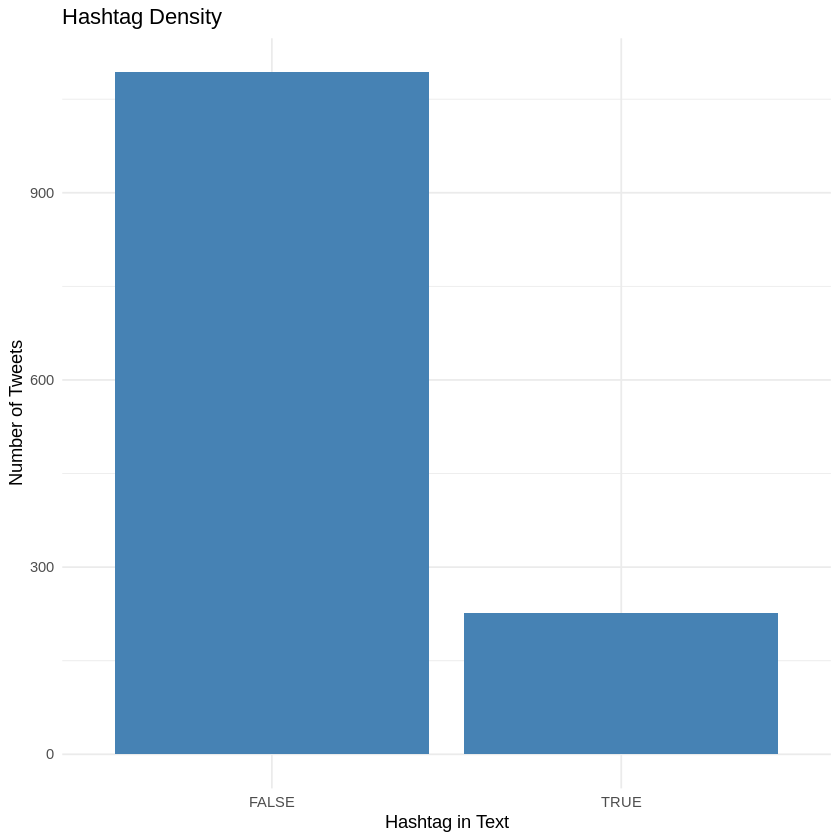

In [62]:
preprocessed_dataset %>%
  ggplot(aes(x=hasHashtag)) + 
  geom_bar(fill="steelblue") + 
  xlab("Hashtag in Text") + 
  ylab("Number of Tweets") +
  ggtitle("Hashtag Density") +
  theme_minimal()

#### Url Density

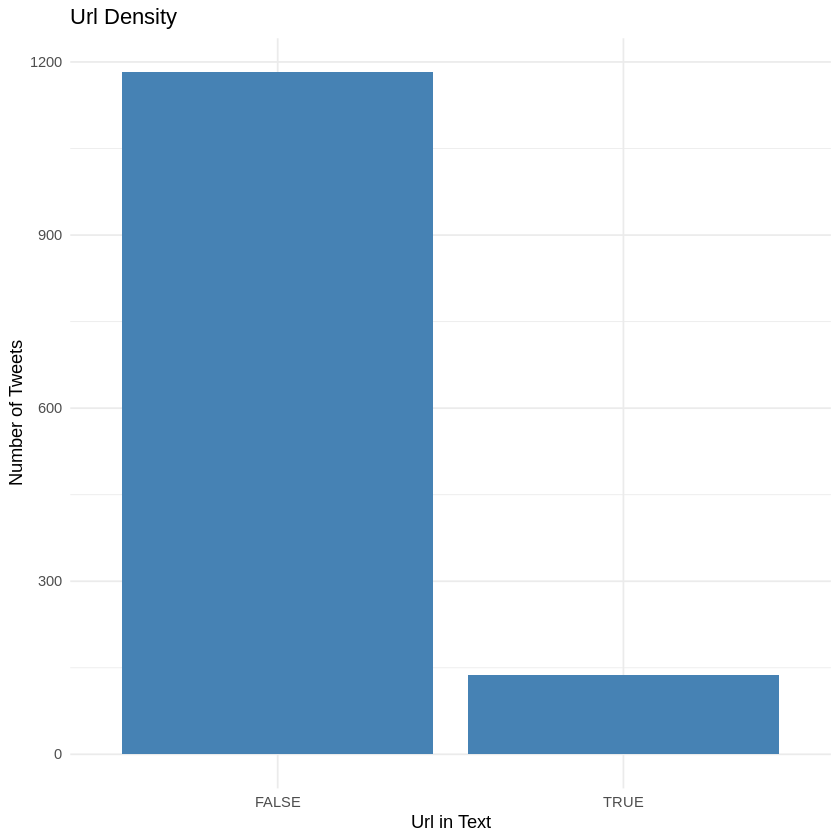

In [63]:
preprocessed_dataset %>%
  ggplot(aes(x=hasUrl)) + 
  geom_bar(fill="steelblue") + 
  xlab("Url in Text") + 
  ylab("Number of Tweets") +
  ggtitle("Url Density") +
  theme_minimal()